# Sentiment Analysis in Python using two different models.
Using NLKT and amazon food review data set to train an NLP model using two different approaches.



1.   VADER approach (Valence Aware Dictionary and sEntiment Reasoner)
2.   Roberta pretrained model from Huggingface.



# **NLTK BASICS and Reading Data**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# Reading in Data

df = pd.read_csv('../Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print(df.shape)
df = df.head(5000) # the data set has almost 500k reviews in total.
print(df.shape)

(494248, 10)
(5000, 10)


Text(0, 0.5, 'Frequency')

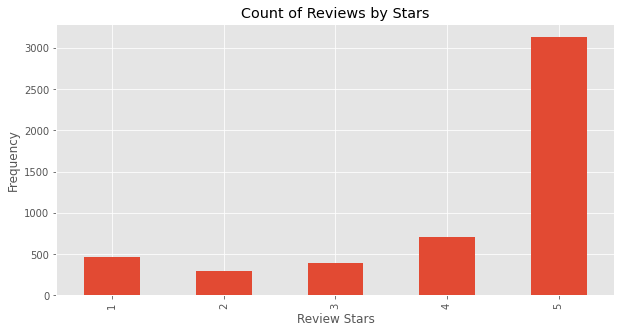

In [7]:
graph = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10,5))
graph.set_xlabel('Review Stars')
graph.set_ylabel('Frequency')

In [10]:
# Basic NLTK

example = df['Text'][150]
print(example)

This is a fabulous marinade!  I love to use it for chicken, either baked in the oven OR on the grill.  This has enough flavor & flair, I've even used it for dinner parties, only to receive rave reviews from my guests!! DEFINITELY worth the price! Super cheap and super easy! Love it!


In [17]:
# Tokenizer
tokens = nltk.word_tokenize(example)
print(tokens)

['This', 'is', 'a', 'fabulous', 'marinade', '!', 'I', 'love', 'to', 'use', 'it', 'for', 'chicken', ',', 'either', 'baked', 'in', 'the', 'oven', 'OR', 'on', 'the', 'grill', '.', 'This', 'has', 'enough', 'flavor', '&', 'flair', ',', 'I', "'ve", 'even', 'used', 'it', 'for', 'dinner', 'parties', ',', 'only', 'to', 'receive', 'rave', 'reviews', 'from', 'my', 'guests', '!', '!', 'DEFINITELY', 'worth', 'the', 'price', '!', 'Super', 'cheap', 'and', 'super', 'easy', '!', 'Love', 'it', '!']


In [23]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
print(tagged)

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('fabulous', 'JJ'), ('marinade', 'NN'), ('!', '.'), ('I', 'PRP'), ('love', 'VBP'), ('to', 'TO'), ('use', 'VB'), ('it', 'PRP'), ('for', 'IN'), ('chicken', 'NN'), (',', ','), ('either', 'DT'), ('baked', 'VBN'), ('in', 'IN'), ('the', 'DT'), ('oven', 'NN'), ('OR', 'NNP'), ('on', 'IN'), ('the', 'DT'), ('grill', 'NN'), ('.', '.'), ('This', 'DT'), ('has', 'VBZ'), ('enough', 'JJ'), ('flavor', 'NN'), ('&', 'CC'), ('flair', 'NN'), (',', ','), ('I', 'PRP'), ("'ve", 'VBP'), ('even', 'RB'), ('used', 'VBN'), ('it', 'PRP'), ('for', 'IN'), ('dinner', 'NN'), ('parties', 'NNS'), (',', ','), ('only', 'RB'), ('to', 'TO'), ('receive', 'VB'), ('rave', 'VB'), ('reviews', 'NNS'), ('from', 'IN'), ('my', 'PRP$'), ('guests', 'NNS'), ('!', '.'), ('!', '.'), ('DEFINITELY', 'NNP'), ('worth', 'IN'), ('the', 'DT'), ('price', 'NN'), ('!', '.'), ('Super', 'NNP'), ('cheap', 'NN'), ('and', 'CC'), ('super', 'JJ'), ('easy', 'NN'), ('!', '.'), ('Love', 'VB'), ('it', 'PRP'), ('!',

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [28]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  a/DT
  fabulous/JJ
  marinade/NN
  !/.
  I/PRP
  love/VBP
  to/TO
  use/VB
  it/PRP
  for/IN
  chicken/NN
  ,/,
  either/DT
  baked/VBN
  in/IN
  the/DT
  oven/NN
  OR/NNP
  on/IN
  the/DT
  grill/NN
  ./.
  This/DT
  has/VBZ
  enough/JJ
  flavor/NN
  &/CC
  flair/NN
  ,/,
  I/PRP
  've/VBP
  even/RB
  used/VBN
  it/PRP
  for/IN
  dinner/NN
  parties/NNS
  ,/,
  only/RB
  to/TO
  receive/VB
  rave/VB
  reviews/NNS
  from/IN
  my/PRP$
  guests/NNS
  !/.
  !/.
  DEFINITELY/NNP
  worth/IN
  the/DT
  price/NN
  !/.
  Super/NNP
  cheap/NN
  and/CC
  super/JJ
  easy/NN
  !/.
  Love/VB
  it/PRP
  !/.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


# **VADER Sentiment Analysis**

Stop words (fillers) are removed, each word is scored and then combined to a total score.

This model does not account for the relationship between words.
Which is why this model is flawed.


In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [32]:
# SIA
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [33]:
# Examples
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [34]:
sia.polarity_scores('This is so bad!')

{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.6988}

In [37]:
print(example)
sia.polarity_scores(example)

This is a fabulous marinade!  I love to use it for chicken, either baked in the oven OR on the grill.  This has enough flavor & flair, I've even used it for dinner parties, only to receive rave reviews from my guests!! DEFINITELY worth the price! Super cheap and super easy! Love it!


{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.9858}

In [39]:
# Loop through the df now!
results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  results[myid] = sia.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [49]:
vaders = pd.DataFrame(results).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')
vaders
# Sentiment score corresponding to each data in the meta data.

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4996,4997,0.026,0.764,0.210,0.9846,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4997,4998,0.097,0.827,0.076,-0.0554,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4998,4999,0.154,0.637,0.209,0.9078,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


**Now let us see how accurate this model is.**

How? We can plot the reviews' scores and their sentiment analysis degree.
Logically, a 5 star review must have more positive score than a 1 star review!

**Plotting Vader Results**

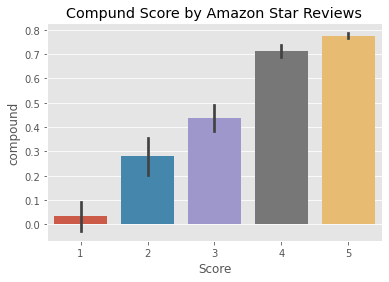

In [50]:
barp = sns.barplot(data=vaders, x='Score', y='compound')
barp.set_title('Compund Score by Amazon Star Reviews')
plt.show()

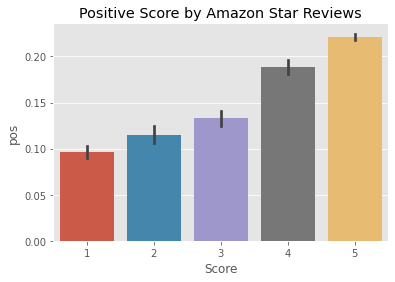

In [57]:
barp = sns.barplot(data=vaders, x='Score', y='pos')
barp.set_title('Positive Score by Amazon Star Reviews')
plt.show()

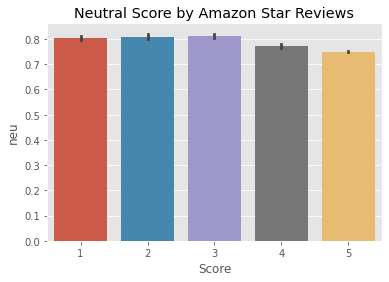

In [59]:
barp = sns.barplot(data=vaders, x='Score', y='neu')
barp.set_title('Neutral Score by Amazon Star Reviews')
plt.show()

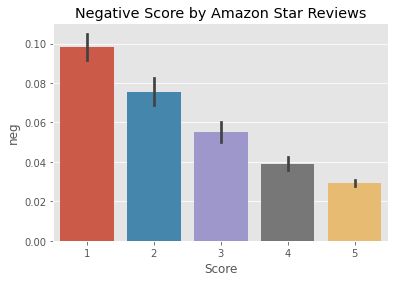

In [60]:
barp = sns.barplot(data=vaders, x='Score', y='neg')
barp.set_title('Negative Score by Amazon Star Reviews')
plt.show()

# **RoBERTa Model**

Use a model trained using large amount of data

Transformer model accounts for the flaw in VADER, words and their contexts related to other words.


In [84]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [86]:
print(example)
model1 = sia.polarity_scores(example)
print(model1)

This is a fabulous marinade!  I love to use it for chicken, either baked in the oven OR on the grill.  This has enough flavor & flair, I've even used it for dinner parties, only to receive rave reviews from my guests!! DEFINITELY worth the price! Super cheap and super easy! Love it!
{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.9858}


In [87]:
# Now with ROBERTA

encoded_text = tokenizer(example, return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0,   713,    16,    10, 17545,  4401,   179,  1829,   328,  1437,
            38,   657,     7,   304,    24,    13,  5884,     6,  1169, 17241,
            11,     5, 12941,  6532,    15,     5, 20212,     4,  1437,   152,
            34,   615, 12117,   359, 27456,     6,    38,   348,   190,   341,
            24,    13,  3630,  1799,     6,   129,     7,  1325, 31278,  6173,
            31,   127,  3958, 12846,  5885, 25623,  2068, 29313,   966,     5,
           425,   328,  1582,  6162,     8,  2422,  1365,   328,  3437,    24,
           328,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [88]:
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.00156644, 0.00683209, 0.9916017 ], dtype=float32)

In [89]:
scores_model2 = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2],
}
print(scores_model2)

{'roberta_neg': 0.0015664432, 'roberta_neu': 0.006832094, 'roberta_pos': 0.9916017}


In [90]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_model2 = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2],
  }
  return scores_model2

In [91]:
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  vader_result = sia.polarity_scores(text)
  roberta_result = polarity_scores_roberta(text)
  print(vader_result)
  print(roberta_result)
  break

  0%|          | 0/5000 [00:00<?, ?it/s]

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}
{'roberta_neg': 0.009624219, 'roberta_neu': 0.049980354, 'roberta_pos': 0.9403955}


In [92]:
{**vader_result, **roberta_result}

{'neg': 0.0,
 'neu': 0.695,
 'pos': 0.305,
 'compound': 0.9441,
 'roberta_neg': 0.009624219,
 'roberta_neu': 0.049980354,
 'roberta_pos': 0.9403955}

In [ ]:
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result, **roberta_result}
    results[myid] = both
  except RuntimeError:
    print(f'Broke because of long text for id {myid}')

In [94]:
df2 = df.head(500)
df2

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [95]:
results2 = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
  text = row['Text']
  myid = row['Id']
  results[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [96]:
for i, row in tqdm(df2.iterrows(), total=len(df2)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result, **roberta_result}
    results2[myid] = both
  except RuntimeError:
    print(f'Broke because of long text for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke because of long text for id 83
Broke because of long text for id 187


In [105]:
results_df = pd.DataFrame(results2).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df2, how='left')
# results_df

# Comparing Scores

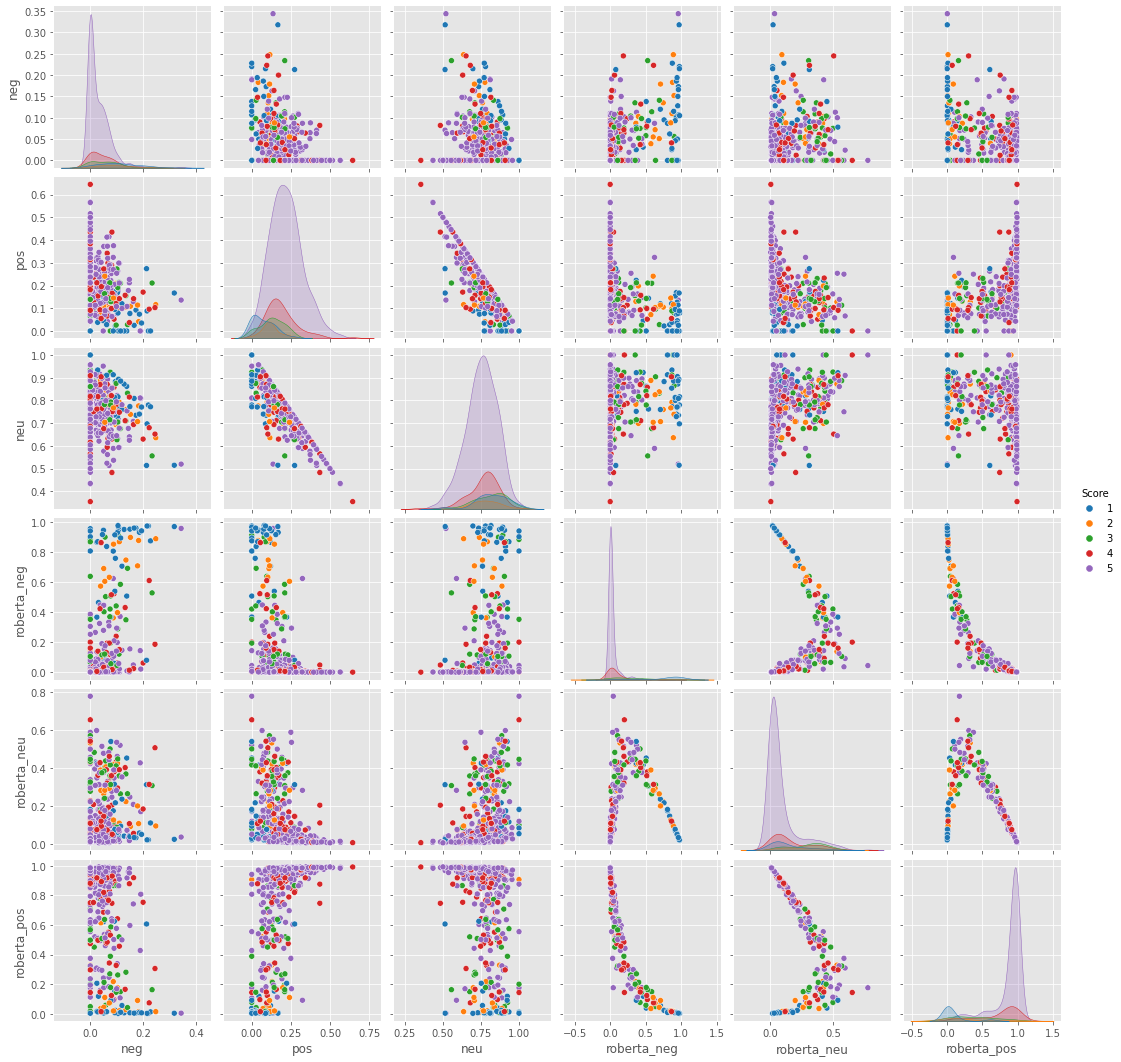

In [106]:
sns.pairplot(data=results_df,
             vars=['neg', 'pos', 'neu', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score', palette='tab10')
plt.show()

5 Star reviews are popular as in the data, there is some correlation between both the models, but the Roberta model seperates the sentiments better.